In [26]:
import plotly.express as px
import pandas as pd
import os
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
project_dir = "/Users/paulp/Library/CloudStorage/OneDrive-UniversityofEasternFinland/UEF/Thesis"
data_dir = os.path.join(project_dir, 'Data')

os.chdir(data_dir)

main_data = pd.read_csv('masked_data_set.csv', index_col = 0, )

In [3]:
main_data

,Corpus,Target,Text,Length,k
0,ICLE,GE,I've been making music now for 20 years. You c...,379,8
1,ICLE,GE,A quick inspection of the waste-paper basket n...,554,6
2,ICLE,CN,Recycling of waste has long been a controversi...,572,1
3,ICLE,CN,"Few years age, government in some cities such ...",773,4
4,ICLE,JP,"Gender discrimination. These Days, we often co...",824,7
...,...,...,...,...,...
16517,TOEFL11,GE,To my mind the statement at hand is a very imp...,510,2
16518,TOEFL11,JP,"Learing a fact, we (human) are always curious ...",368,2
16519,TOEFL11,CN,"Nowadays, more and more people go abroad, no m...",399,3
16520,TOEFL11,SP,"At the beginning of the 21st century, the incr...",377,9


In [50]:
pd.pivot(main_data.loc[main_data['k'] == 1], index='Corpus', columns='Target')#, values='points')

ValueError: Index contains duplicate entries, cannot reshape

In [57]:
main_data.value_counts(subset=['Target', 'Corpus'])

Target  Corpus 
GE      EFCAM      3363
SP      EFCAM      1959
RU      EFCAM      1776
GE      TOEFL11    1085
SP      TOEFL11    1021
CN      TOEFL11    1002
        EFCAM       983
JP      TOEFL11     867
AR      TOEFL11     804
CN      ICLE        757
AR      EFCAM       667
JP      EFCAM       603
        ICLE        365
AR      PELIC       305
GE      ICLE        281
RU      ICLE        250
SP      ICLE        186
CN      PELIC       150
JP      PELIC        48
SP      PELIC        43
RU      PELIC         6
GE      PELIC         1
dtype: int64

In [32]:
fig = make_subplots(rows=5, cols=2)
for k in range(len(set(main_data['k']))):
    data = main_data.loc[main_data['k'] == k]
    row = k + 1
    column = math.ceil(k + 1 / 2)
    fig.add_trace(
        go.Bar(data['Target'], 
              color = data['Corpus'],
              showlegend=False),
        row=row, col=column
    )
    
fig.update_layout(height=1500, width=800, title_text="Side By Side Subplots")
fig.update_traces(dict(marker_line_width=0))
fig.show()

ValueError: The first argument to the plotly.graph_objs.Bar
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Bar`

In [82]:
fig = make_subplots(rows=5, cols=2)
for k in range(len(set(main_data['k']))):
    data = main_data.loc[main_data['k'] == k]
    row = k + 1
    column = math.ceil(k + 1 / 2)
    fig.add_trace(
        go.Bar(x = data['Target'],
            y=data['Corpus']),
        row=row, col=column
    )
    
fig.update_layout(height=1500, width=800, title_text="Side By Side Subplots")
fig.update_traces(dict(marker_line_width=0))
fig.show()

Exception: The (row, col) pair sent is out of range. Use Figure.print_grid to view the subplot grid. 

In [112]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x106276940>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical distrib

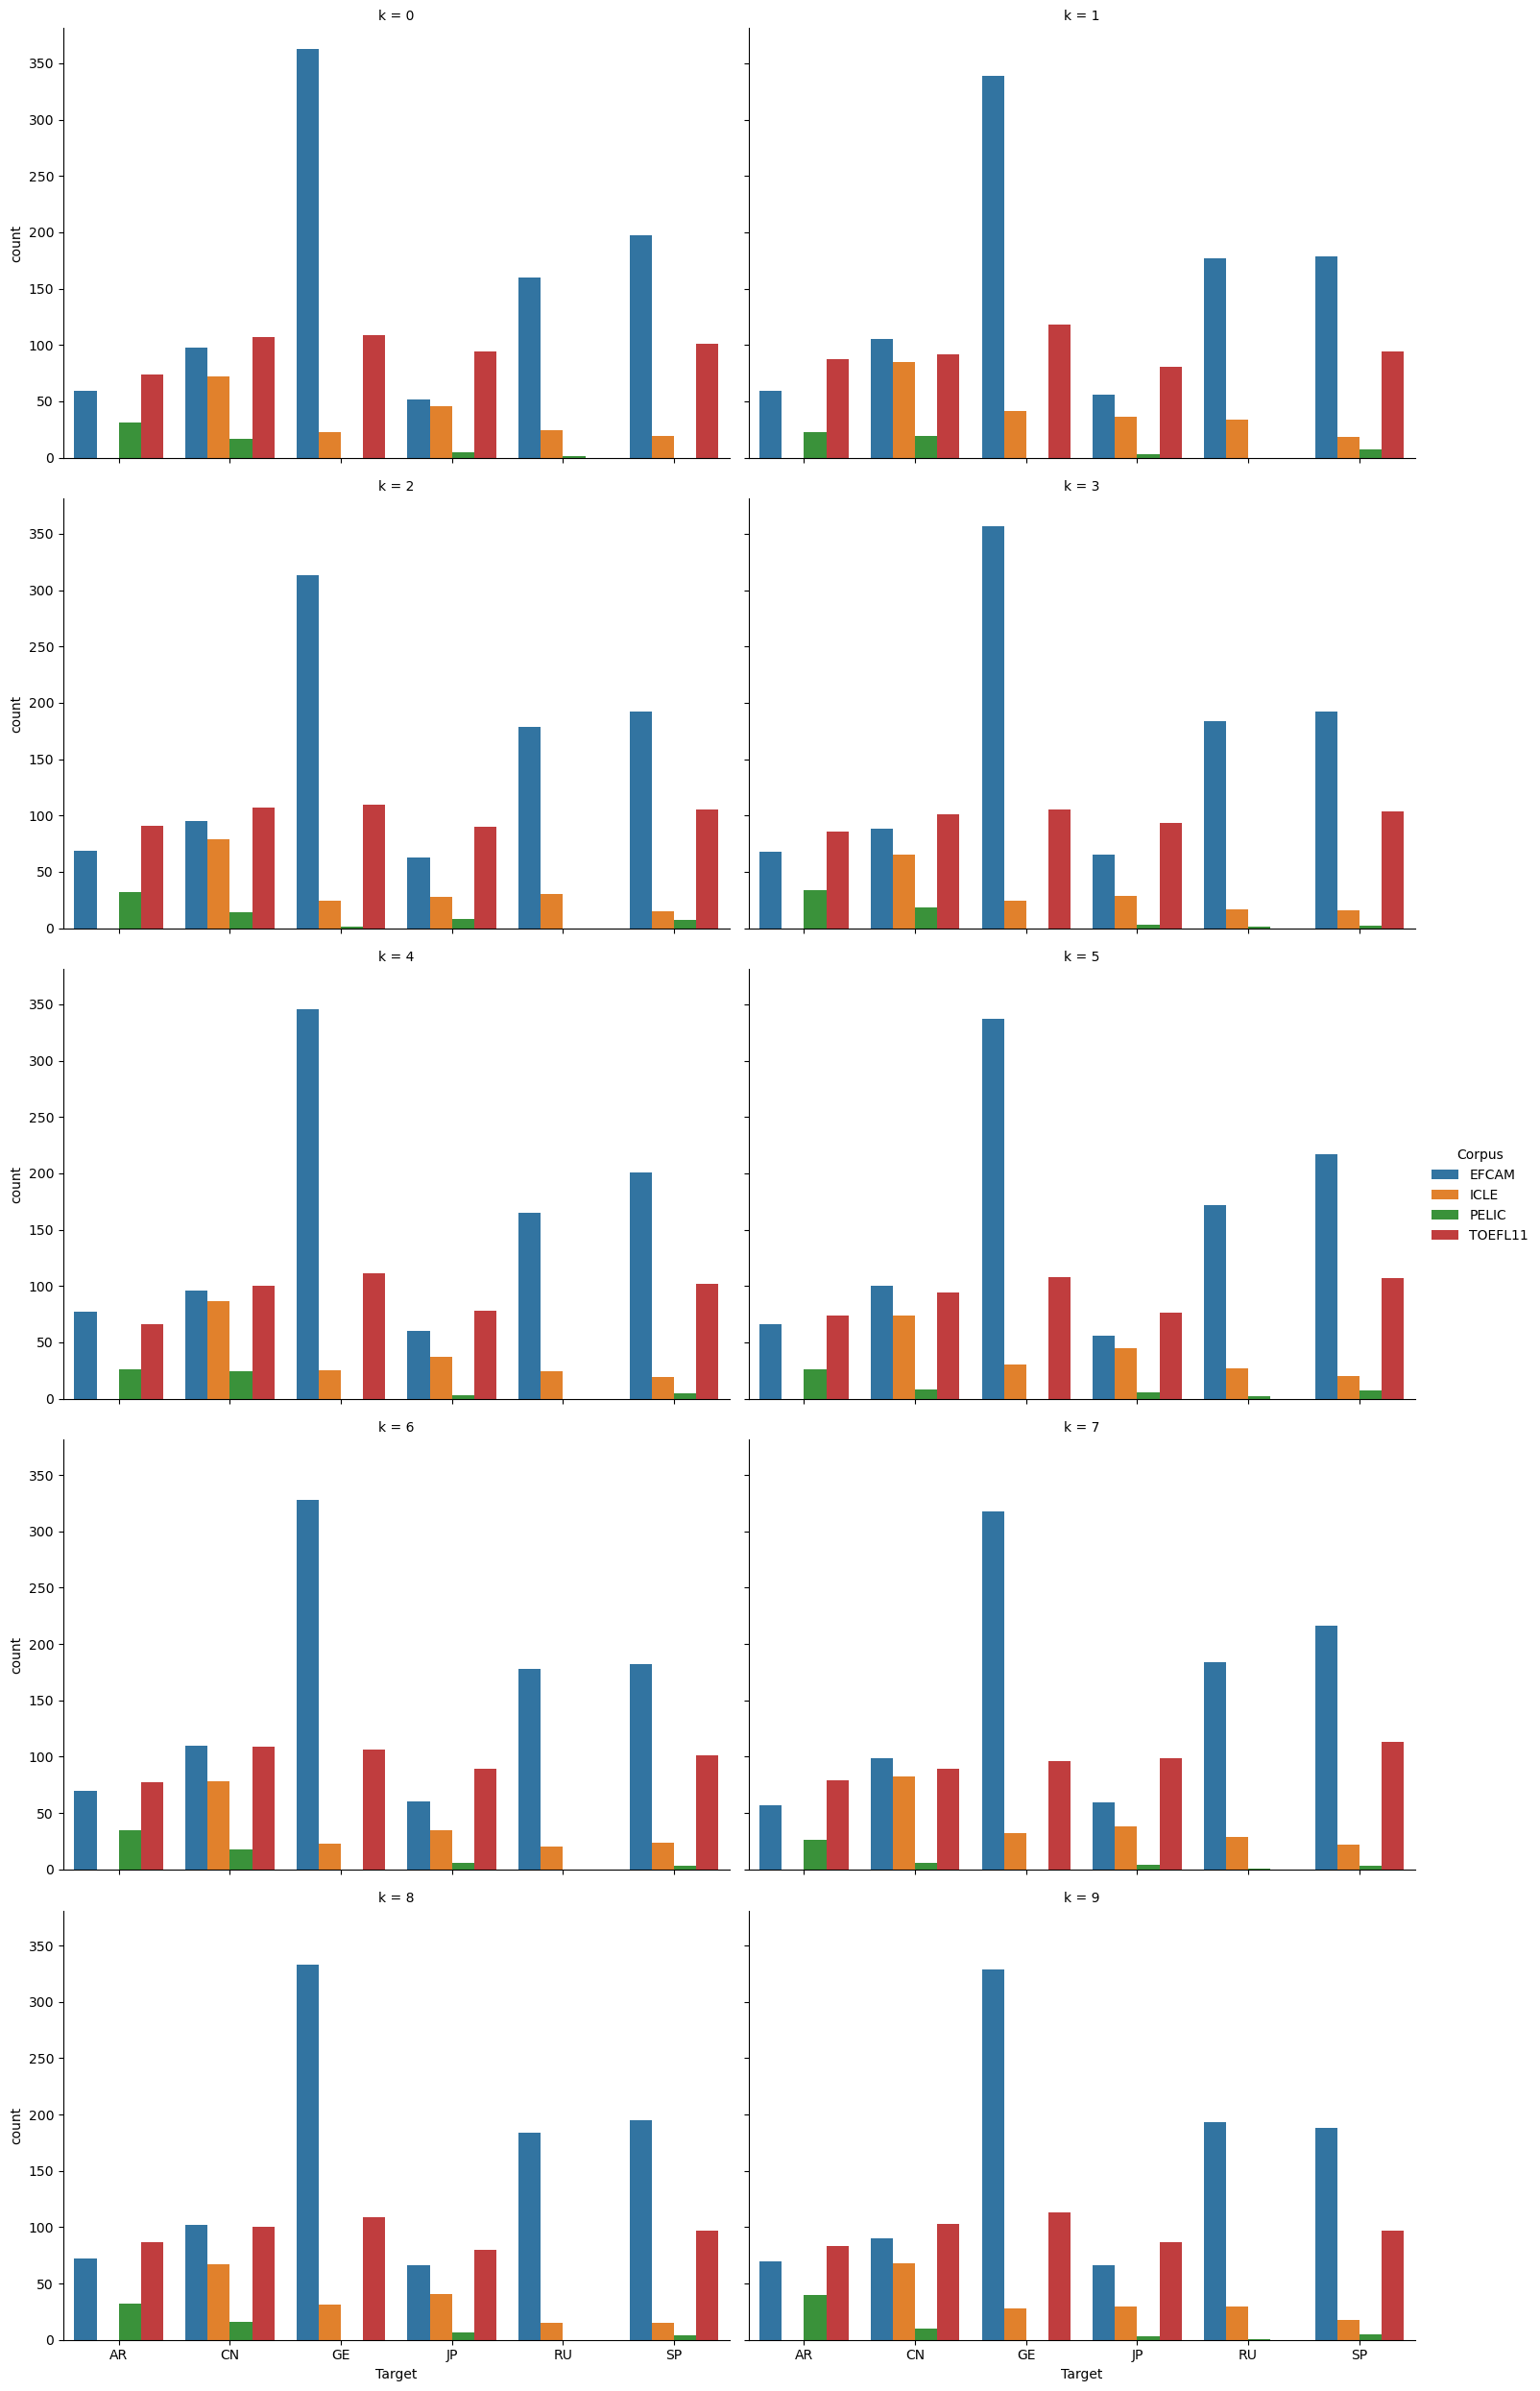

In [113]:
import seaborn as sns
fig = sns.catplot(x='Target', hue = 'Corpus',
              col='k', 
              data=main_data, kind='count', 
                  height = 5, aspect = 1.5, col_wrap=2,
              sharey=True)
fig

In [114]:
fig.savefig('K_SUBCORPUS_DIST')

In [108]:
help(fig.savefig)

Help on method savefig in module seaborn.axisgrid:

savefig(*args, **kwargs) method of seaborn.axisgrid.FacetGrid instance
    Save an image of the plot.
    
    This wraps :meth:`matplotlib.figure.Figure.savefig`, using bbox_inches="tight"
    by default. Parameters are passed through to the matplotlib function.



NameError: name 'plt' is not defined

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

trace1 = Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[20, 14, 23],
    name='SF Zoo'
)
trace2 = Bar(
    x=['giraffes', 'orangutans', 'monkeys'],
    y=[12, 18, 29],
    name='LA Zoo'
)
trace3 = Scatter(
  x=['giraffes', 'orangutans', 'monkeys']
  ,y=[33,20,17]
  ,name='subplots ftw'
  )


fig = tools.make_subplots(rows=2, cols=1, shared_xaxes=True)

fig.append_trace(trace3, 1,1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2,2,1)


fig['layout'].update(height=600, width=600)
iplot(fig)


In [69]:
main_data['Corpus'] = main_data.Corpus.astype('category')
main_data['Target'] = main_data.Target.astype('category')

In [73]:
target_sums = main_data.groupby(by='Target').Corpus.value_counts()#['Corpus']#(subset = ['Target', 'Corpus'])

In [74]:
target_sums.index

MultiIndex([('AR', 'TOEFL11'),
            ('AR',   'EFCAM'),
            ('AR',   'PELIC'),
            ('AR',    'ICLE'),
            ('CN', 'TOEFL11'),
            ('CN',   'EFCAM'),
            ('CN',    'ICLE'),
            ('CN',   'PELIC'),
            ('GE',   'EFCAM'),
            ('GE', 'TOEFL11'),
            ('GE',    'ICLE'),
            ('GE',   'PELIC'),
            ('JP', 'TOEFL11'),
            ('JP',   'EFCAM'),
            ('JP',    'ICLE'),
            ('JP',   'PELIC'),
            ('RU',   'EFCAM'),
            ('RU',    'ICLE'),
            ('RU',   'PELIC'),
            ('RU', 'TOEFL11'),
            ('SP',   'EFCAM'),
            ('SP', 'TOEFL11'),
            ('SP',    'ICLE'),
            ('SP',   'PELIC')],
           names=['Target', 'Corpus'])

In [76]:
fig = go.Figure()
px.bar(main_data,
      x = 'Target',
      color = 'Corpus')

In [ ]:
import plotly.graph_objects as go

x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(x=x, y=[2,5,1,9], name='Montreal'))
fig.add_trace(go.Bar(x=x, y=[1, 4, 9, 16], name='Ottawa'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='Toronto'))

fig.update_layout(barmode='stack')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [39]:
main_data.loc[main_data['k'] ==1 ,:]

,Corpus,Target,Text,Length,k
2,ICLE,CN,Recycling of waste has long been a controversi...,572,1
19,ICLE,JP,I think most important things are that I try t...,658,1
25,ICLE,CN,In many public places like cinema and shopping...,504,1
29,ICLE,JP,Every <MISC> students learning <MISC> when the...,700,1
37,ICLE,RU,Life in the whole world has changed radically ...,677,1
...,...,...,...,...,...
16474,TOEFL11,GE,Advertising products is very important for the...,455,1
16486,TOEFL11,JP,The issue is that if the advertisements helps ...,297,1
16503,TOEFL11,SP,It's equally important for a student to undert...,419,1
16505,TOEFL11,CN,"When I was young, i tired many new things and ...",388,1


In [15]:
main_data['k'].unique()

array([8, 6, 1, 4, 7, 5, 0, 2, 3, 9])

In [20]:
help(go.Bar)

Help on class Bar in module plotly.graph_objs._bar:

class Bar(plotly.basedatatypes.BaseTraceType)
 |  Bar(arg=None, alignmentgroup=None, base=None, basesrc=None, cliponaxis=None, constraintext=None, customdata=None, customdatasrc=None, dx=None, dy=None, error_x=None, error_y=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, insidetextanchor=None, insidetextfont=None, legendgroup=None, legendgrouptitle=None, legendrank=None, marker=None, meta=None, metasrc=None, name=None, offset=None, offsetgroup=None, offsetsrc=None, opacity=None, orientation=None, outsidetextfont=None, selected=None, selectedpoints=None, showlegend=None, stream=None, text=None, textangle=None, textfont=None, textposition=None, textpositionsrc=None, textsrc=None, texttemplate=None, texttemplatesrc=None, uid=None, uirevision=None, unselected=None, visible=None, width=None, widthsrc=None, x=None, x0=None, xaxis=